## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston['medv']

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
X.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object

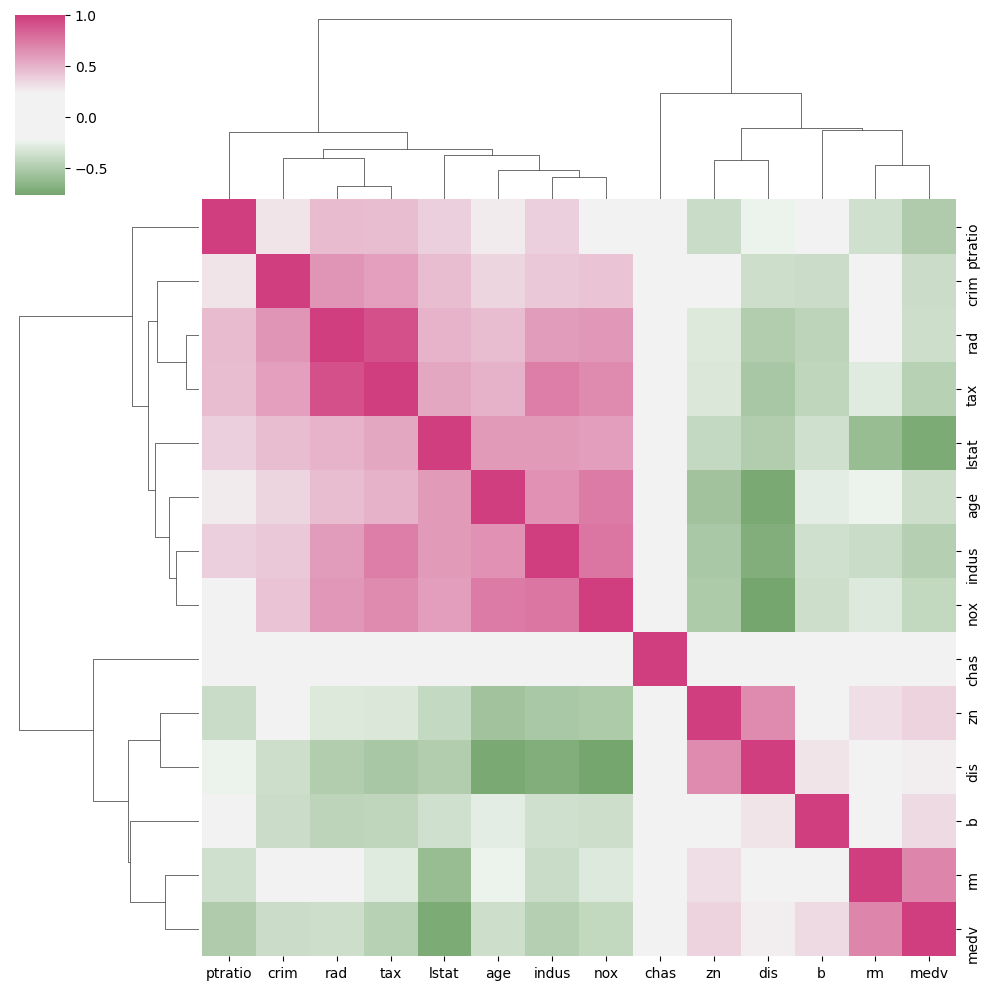

In [5]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(boston.corr(),center=0,figsize=(10,10),cmap=cmap)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=96)

In [7]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [8]:
path = regr_2.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.31926121e-05, 1.75901495e-05, 5.27704485e-05,
        1.18733509e-04, 2.11081794e-04, 2.15479332e-04, 4.74934037e-04,
        6.33245383e-04, 6.33245383e-04, 6.46437995e-04, 1.06420405e-03,
        1.06860158e-03, 1.59630607e-03, 1.59630607e-03, 1.59630607e-03,
        1.59630607e-03, 1.62834527e-03, 1.89973615e-03, 2.12840809e-03,
        2.54177661e-03, 2.96833773e-03, 3.27264732e-03, 3.34432718e-03,
        3.37730871e-03, 4.27440633e-03, 4.50307828e-03, 5.69920844e-03,
        5.81794195e-03, 6.65127529e-03, 6.75461741e-03, 9.28979771e-03,
        1.09938434e-02, 1.10325418e-02, 1.26781003e-02, 1.34643799e-02,
        1.35092348e-02, 1.39346966e-02, 1.58313859e-02, 1.63632366e-02,
        1.71154354e-02, 1.78364116e-02, 2.06860158e-02, 2.16101583e-02,
        2.19876869e-02, 2.47361478e-02, 2.79155673e-02, 3.37871592e-02,
        3.56200528e-02, 3.99992671e-02, 4.33523893e-02, 4.38970390e-02,
        5.06090472e-02, 5.46012899e-02, 5.51627089

Text(0, 0.5, 'Impureza total de folhas')

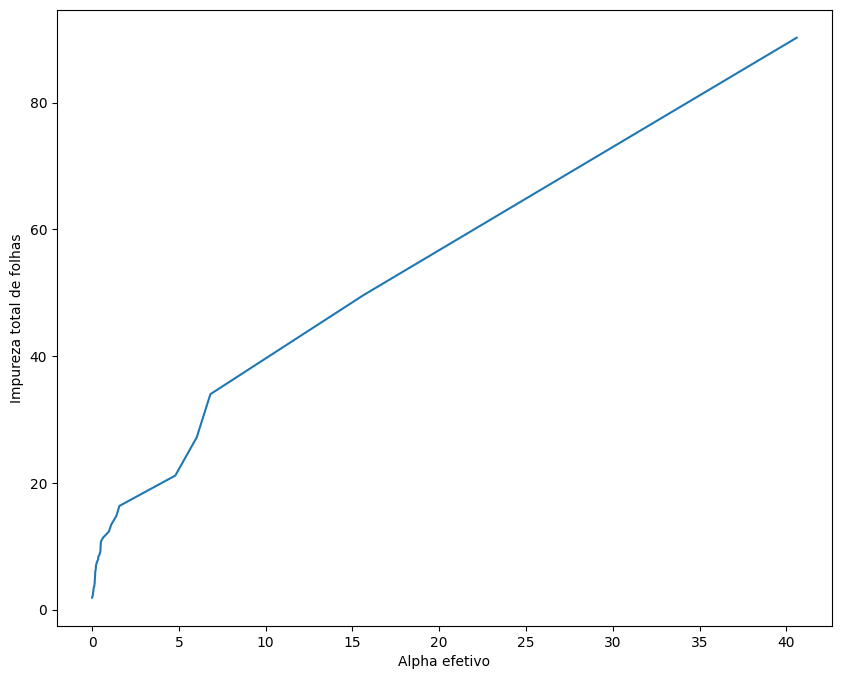

In [9]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10,8))
plt.plot(ccp_alphas,impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total de folhas')


### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
clfs = []

for ccp_alpha in ccp_alphas:
    valor = DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
    valor.fit(X_train,y_train)
    clfs.append(valor)
clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.3192612137491133e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.759014951625489e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.2770448548802164e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0001187335092356204, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0002110817941949087, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00021547933157449738, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00047493403693888206, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0006332453825850261, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0006332453825857384, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0006464379947226671, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.001064204045734471, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0010686015831133844, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0015963060686015936, random_state=0),
 Decisio

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [11]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

In [12]:
train_scores

[0.0,
 0.0001846965699208426,
 0.000307827616534741,
 0.0009982409850483752,
 0.003948988566402827,
 0.004648197009674588,
 0.006978891820580483,
 0.012375989445910295,
 0.016821899736147755,
 0.01935488126649076,
 0.02318601583113455,
 0.03617985927880386,
 0.04045426561125767,
 0.05296437994722954,
 0.05775329815303428,
 0.05775329815303428,
 0.05775329815303428,
 0.06420919713531852,
 0.06969732378439503,
 0.07967533609749972,
 0.09640595552205054,
 0.1044741173514261,
 0.13549233572056796,
 0.13549233572056796,
 0.14559128031159696,
 0.1768571428571429,
 0.18581272772961435,
 0.2169606601255678,
 0.2514423789344634,
 0.2896169611684124,
 0.2963715785826604,
 0.4039850644811067,
 0.4149098665919247,
 0.42590371003959404,
 0.558310005847275,
 0.558310005847275,
 0.5987928554514966,
 0.6127275520214175,
 0.6888026843170799,
 0.7854889562685233,
 0.8191532042896316,
 0.8191532042896316,
 0.9317694364157582,
 0.9740656105582383,
 0.9740656105582383,
 1.0917116691575797,
 1.1931797560033

In [13]:
test_scores 

[13.99755905511811,
 14.00222440944882,
 14.012020997375329,
 13.973499562554682,
 13.946084864391949,
 13.913525809273839,
 13.895446194225721,
 13.861091491688539,
 13.906001815398076,
 13.8915136264217,
 13.911620713035871,
 13.837179199475065,
 13.77074219160105,
 13.787468963254595,
 13.843335104986878,
 13.843335104986878,
 13.843335104986878,
 13.82328679629332,
 13.851948213616156,
 13.812295457710643,
 13.812180111414643,
 13.782283501615868,
 13.854981953595086,
 13.854981953595086,
 13.845065615012407,
 13.713949312139551,
 13.60772118440552,
 13.495881663222422,
 13.507284427162643,
 13.223603937223887,
 13.223603937223887,
 12.738544351200664,
 12.738544351200664,
 12.738544351200664,
 12.564238665019076,
 12.564238665019076,
 12.404726066593879,
 12.376416519349783,
 12.401770159491576,
 12.177833030552812,
 12.177833030552812,
 12.177833030552812,
 11.893216698136419,
 11.90424032018366,
 11.90424032018366,
 11.574223327333481,
 11.656547237553271,
 11.694292996119163,
 

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Text(0, 0.5, 'Profundidade da árvore')

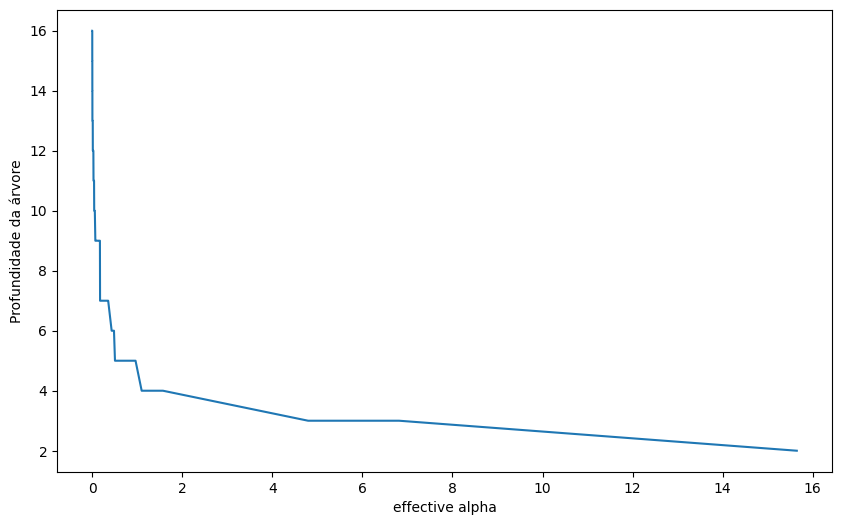

In [14]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [15]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.01)
arvore_final.fit(X_train,y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R² na base de testes: {arvore_final.score(X_test,y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}')

Profundidade: 13
R² na base de testes: 0.81
MSE na base de testes: 12.74


### 7. Visualize esta árvore.

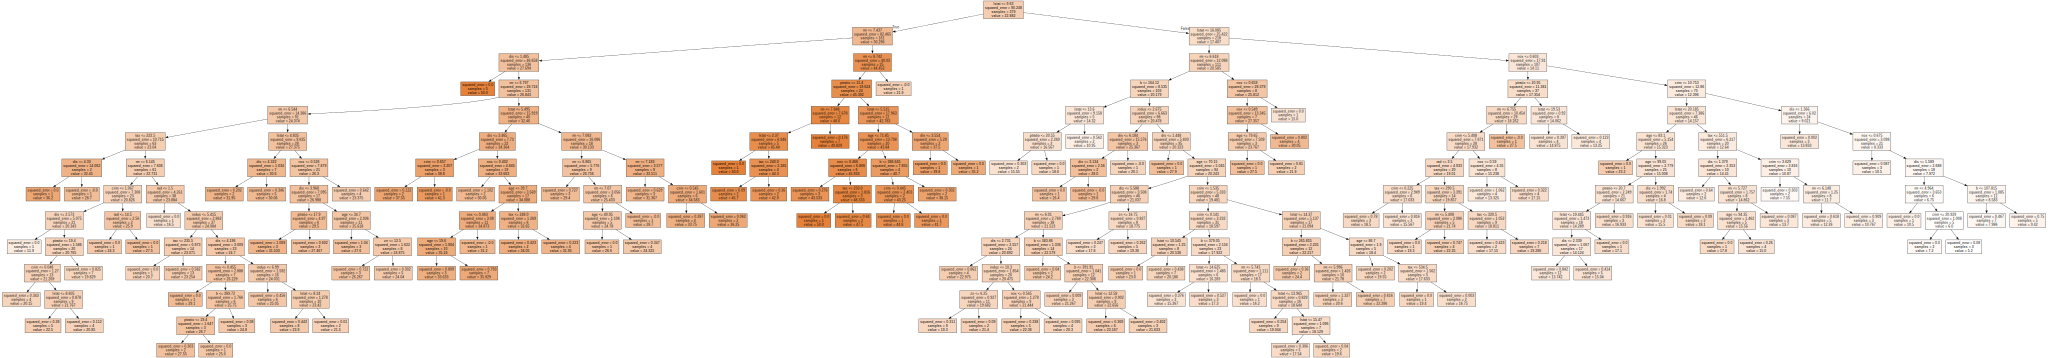

In [16]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(arvore_final, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph